# Polynomial Regression

In [1]:
# importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# reading data
df = pd.read_csv('../datasets/Regression/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# getting required columns only
cdf = df[['ENGINESIZE', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [4]:
# splitting the data for training and testing
msk = np.random.rand(len(cdf)) < 0.80
train = cdf[msk]
test = cdf[~msk]

In [5]:
# storing data in required variable
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [6]:
# importing library for prediction
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.transform(test_x)

regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)

print("Intercept :", regr.intercept_)
print("Coefficient :", regr.coef_)


Intercept : [110.49234723]
Coefficient : [[ 0.         48.37808972 -1.27836055]]


In [7]:
# Testing the trained model
from sklearn.metrics import r2_score
print("MAE : %.2f" % np.mean(np.absolute(regr.predict(test_x_poly) - test_y)))
print("MSE : %.2f" % np.mean((regr.predict(test_x_poly) - test_y)**2))
print("variance score : %.2f" % regr.score(test_x_poly, test_y))
print("variance score : %.2f" % r2_score(test_y, regr.predict(test_x_poly)))

MAE : 24.08
MSE : 1007.15
variance score : 0.75
variance score : 0.75


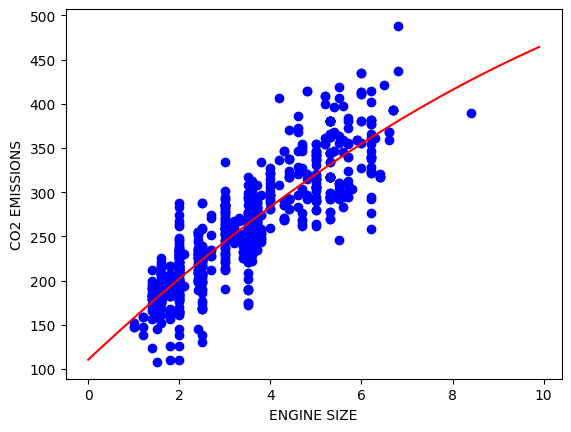

In [8]:
# not plotting the best fit line 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
x = np.arange(0.0, 10.0, 0.1)
y = regr.intercept_[0] + regr.coef_[0][1] * x + regr.coef_[0][2] * np.power(x,2)
plt.plot(x,y,'-r')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()